# NAME - PARIKSHIT SAHU
### OIBSIP_TASK_3
### AIM - CAR PRICE PREDICTION WITH MACHINE LEARNING

### IMPORTING THE LIBRARIES

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:\\OIB\\archive (2)\\car data.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [17]:
x = df[['Present_Price', 'Year', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Owner']]
y = df['Selling_Price']

In [18]:
x

,Present_Price,Year,Driven_kms,Fuel_Type,Selling_type,Owner
0,5.59,2014,27000,Petrol,Dealer,0
1,9.54,2013,43000,Diesel,Dealer,0
2,9.85,2017,6900,Petrol,Dealer,0
3,4.15,2011,5200,Petrol,Dealer,0
4,6.87,2014,42450,Diesel,Dealer,0
...,...,...,...,...,...,...
296,11.60,2016,33988,Diesel,Dealer,0
297,5.90,2015,60000,Petrol,Dealer,0
298,11.00,2009,87934,Petrol,Dealer,0
299,12.50,2017,9000,Diesel,Dealer,0


In [19]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [20]:
label_encoder = LabelEncoder()
x['Fuel_Type'] = label_encoder.fit_transform(x['Fuel_Type'])
x['Selling_type'] = label_encoder.fit_transform(x['Selling_type'])

C:\Users\sahup\AppData\Local\Temp\ipykernel_9624\2509801844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Fuel_Type'] = label_encoder.fit_transform(x['Fuel_Type'])
C:\Users\sahup\AppData\Local\Temp\ipykernel_9624\2509801844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Selling_type'] = label_encoder.fit_transform(x['Selling_type'])


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
predictions = model.predict(x_test)

In [25]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [26]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.8029040614754095
R-squared Score: 0.965145053698629


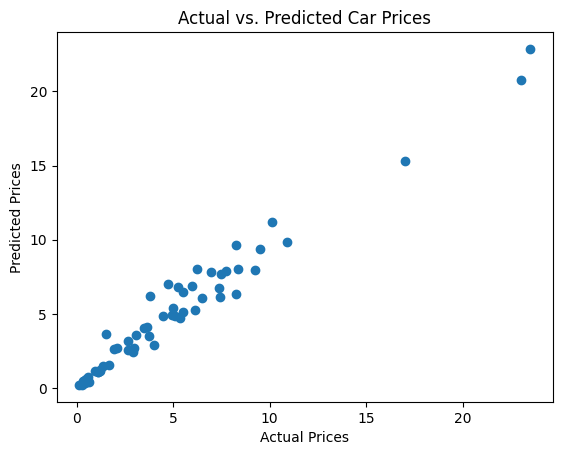

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.show()